In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_data/TfL_2024_Cleaned_Data.csv')
sns.set_theme(style="whitegrid")


In [12]:
file_path = 'cleaned_data/TfL_2024_Cleaned_Data.csv'
print(f"Loading data from: {file_path}")
df = pd.read_csv(file_path)

print(f"Data Loaded. Total rows: {len(df)}")
# print(df.head(2))

try:
    # Convert start and end times to datetime objects
    df['Start_Date'] = pd.to_numeric(pd.to_datetime(df['Start_Date']))
    df['End_Date'] = pd.to_numeric(pd.to_datetime(df['End_Date']))
    
    # Calculate duration in minutes: (End - Start) converted to minutes
    # Note: subtracting datetimes gives a Timedelta
    df['Calc_Duration_Min'] = (pd.to_datetime(df['End_Date']) - pd.to_datetime(df['Start_Date'])).dt.total_seconds() / 60
    
    # Filter out weird data (negative time or rides > 2 hours for this chart)
    # We keep rows where duration is between 0 and 120 minutes for a good histogram
    duration_data = df[(df['Calc_Duration_Min'] > 0) & (df['Calc_Duration_Min'] <= 60)]
    
    print(" Successfully re-calculated duration from Start/End dates.")
    
except Exception as e:
    print(f" Could not re-calculate duration: {e}")
    # Fallback: try to use existing column if calculation fails
    duration_data = df



Loading data from: cleaned_data/TfL_2024_Cleaned_Data.csv
Data Loaded. Total rows: 4559587
 Successfully re-calculated duration from Start/End dates.


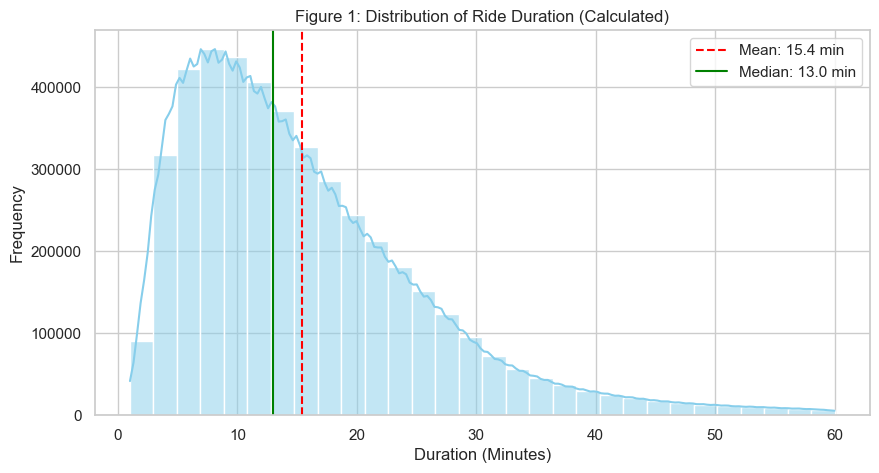

Mean Duration: 15.44 min
Median Duration: 13.00 min


In [13]:
# Ride Duration Distribution
if 'Calc_Duration_Min' in df.columns and not duration_data.empty:
    plt.figure(figsize=(10, 5))
    sns.histplot(duration_data['Calc_Duration_Min'], bins=30, kde=True, color='skyblue')
    
    mean_val = duration_data['Calc_Duration_Min'].mean()
    median_val = duration_data['Calc_Duration_Min'].median()
    
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f} min')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.1f} min')
    
    plt.title('Figure 1: Distribution of Ride Duration (Calculated)')
    plt.xlabel('Duration (Minutes)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    print(f"Mean Duration: {mean_val:.2f} min")
    print(f"Median Duration: {median_val:.2f} min")
else:
    print(" Metric 1 Skipped: No valid duration data found.")

/var/folders/qs/dg6bw2fn2f9dycz061jn4yvh0000gn/T/ipykernel_80691/4057274311.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')


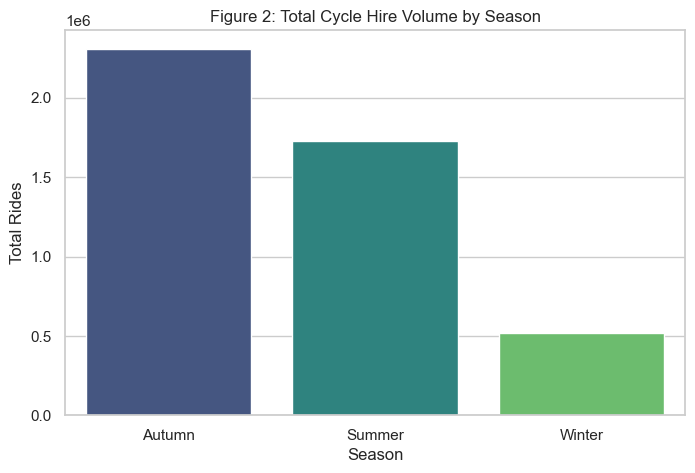

In [14]:
# Total Rides by Season

if 'Season' in df.columns:
    plt.figure(figsize=(8, 5))
    season_counts = df['Season'].value_counts()
    sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
    plt.title('Figure 2: Total Cycle Hire Volume by Season')
    plt.xlabel('Season')
    plt.ylabel('Total Rides')
    plt.show()

/var/folders/qs/dg6bw2fn2f9dycz061jn4yvh0000gn/T/ipykernel_80691/3859198184.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plot_data, x='Day_of_Week', order=day_order, palette='magma')


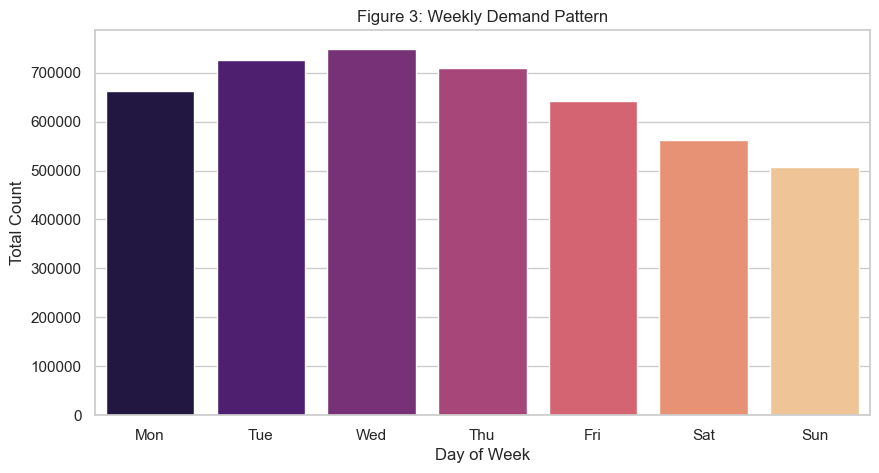

In [15]:
# Total Rides by Day of Week
if 'Day_of_Week' in df.columns:
    plt.figure(figsize=(10, 5))
    day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    
    plot_data = df.copy()
    
    if pd.api.types.is_numeric_dtype(plot_data['Day_of_Week']):
        day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
        plot_data['Day_of_Week'] = plot_data['Day_of_Week'].map(day_map)
        
    sns.countplot(data=plot_data, x='Day_of_Week', order=day_order, palette='magma')
    plt.title('Figure 3: Weekly Demand Pattern')
    plt.xlabel('Day of Week')
    plt.ylabel('Total Count')
    plt.show()